In [356]:
#Bank Loan Approval

#By Ravi Asopa

In [357]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("loan_data.csv")

df.shape

(45000, 14)

In [358]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [359]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  int64  
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  int64  
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [360]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [361]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [362]:
# Filter for valid age range
df = df[(df['person_age'] >= 18) & (df['person_age'] <= 65)]


In [363]:
#Label Encoding
le = LabelEncoder()

df['person_gender'] = le.fit_transform(df['person_gender'])
df['person_education'] = le.fit_transform(df['person_education'])
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
df['loan_intent'] = le.fit_transform(df['loan_intent'])
df['previous_loan_defaults_on_file'] = le.fit_transform(df['previous_loan_defaults_on_file'])

<Figure size 600x500 with 0 Axes>

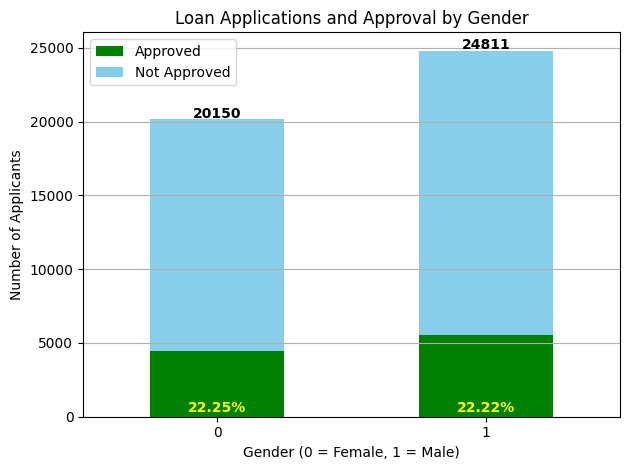

In [372]:
#Loan Application And Approval By Gender
total_applicants = df.groupby('person_gender').size()
approved_applicants = df.groupby('person_gender')['loan_status'].sum()
approval_percent = (approved_applicants / total_applicants * 100).round(2)

summary = pd.DataFrame({
    'Approved': approved_applicants,
    'Not Approved': total_applicants - approved_applicants
})

plt.figure(figsize=(6, 5))
summary.plot(kind='bar', stacked=True, color=['green', 'skyblue'])

plt.title("Loan Applications and Approval by Gender")
plt.ylabel("Number of Applicants")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()

for i, total in enumerate(total_applicants):
    plt.text(i, total + 100, f"{total}", ha='center', fontsize=10, weight='bold')

for i, (percent) in enumerate(approval_percent):
    plt.text(i, percent + 100, f"{percent}%", ha='center', va='bottom', fontsize=10, weight='bold', color='yellow')

plt.savefig("plots/approval_by_gender.png")
plt.show()


C:\Users\Deepak\AppData\Local\Temp\ipykernel_15344\3712810842.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_by_credit_score = df.groupby('credit_score_bins')['loan_status'].mean() * 100


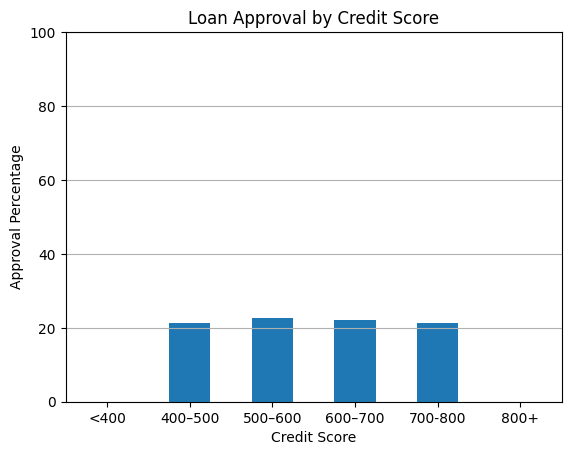

In [371]:
#Loan Approval % By Credit Score
df['credit_score_bins'] = pd.cut(
    df['credit_score'],
    bins=[0, 400, 500, 600, 700, 800, 900],
    labels=['<400', '400–500', '500–600', '600–700', '700-800', '800+']
)

approval_by_credit_score = df.groupby('credit_score_bins')['loan_status'].mean() * 100

approval_by_credit_score.plot(kind='bar')
plt.title("Loan Approval by Credit Score")
plt.ylabel("Approval Percentage")
plt.xlabel("Credit Score")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.savefig("plots/approval_by_credit_score.png")
plt.show()

C:\Users\Deepak\AppData\Local\Temp\ipykernel_15344\1049773603.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_by_income = df.groupby('income_bins')['loan_status'].mean() * 100


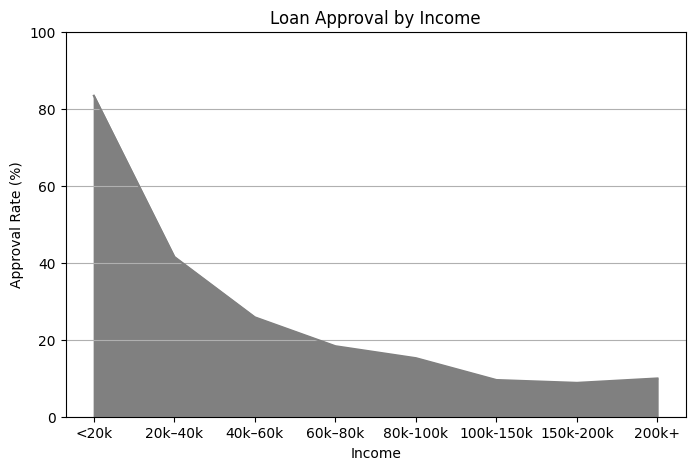

In [373]:
#Loan Approval % By Income
df['income_bins'] = pd.cut(
    df['person_income'],
    bins=[0, 20000, 40000, 60000, 80000, 100000, 150000, 200000, df['person_income'].max()],
    labels=['<20k', '20k–40k', '40k–60k', '60k–80k', '80k-100k', '100k-150k', '150k-200k', '200k+']
)

approval_by_income = df.groupby('income_bins')['loan_status'].mean() * 100
plt.figure(figsize=(8, 5))

approval_by_income.plot(kind='area', color='gray')
plt.title("Loan Approval by Income")
plt.ylabel("Approval Rate (%)")
plt.xlabel("Income")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.savefig("plots/approval_by_income.png")
plt.show()


C:\Users\Deepak\AppData\Local\Temp\ipykernel_15344\3926889493.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_by_loan_int_rate = df.groupby('loan_int_rate_bins')['loan_status'].mean() * 100


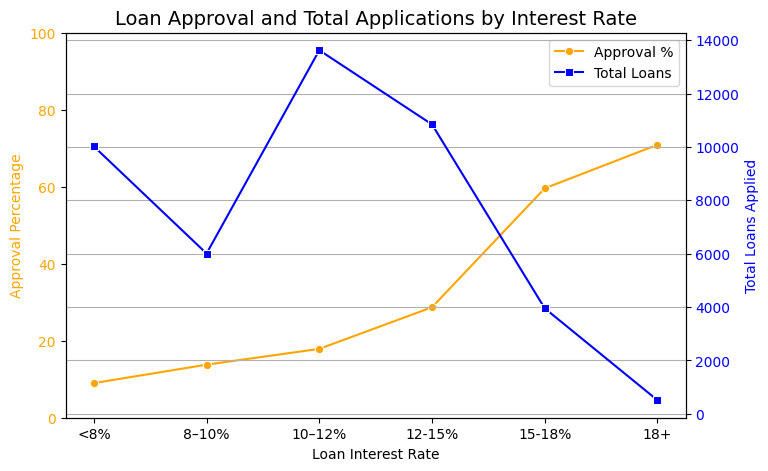

In [374]:
#Loan Application And Approval By Loan Interest Rate
df['loan_int_rate_bins'] = pd.cut(
    df['loan_int_rate'],
    bins=[0, 8, 10, 12, 15, 18, df['loan_int_rate'].max()],
    labels=['<8%', '8–10%', '10–12%', '12-15%', '15-18%', '18+']
)

approval_by_loan_int_rate = df.groupby('loan_int_rate_bins')['loan_status'].mean() * 100

loan_counts_by_rate = df['loan_int_rate_bins'].value_counts().sort_index()

fig, ax1 = plt.subplots(figsize=(8, 5))

sns.lineplot(
    x=approval_by_loan_int_rate.index.astype(str),
    y=approval_by_loan_int_rate.values,
    marker='o',
    linestyle='-',
    color='orange',
    ax=ax1
)
ax1.set_ylabel('Approval Percentage', color='orange')
ax1.set_ylim(0, 100)
ax1.tick_params(axis='y', labelcolor='orange')

ax2 = ax1.twinx()
sns.lineplot(
    x=loan_counts_by_rate.index.astype(str),
    y=loan_counts_by_rate.values,
    marker='s',
    linestyle='-',
    color='blue',
    ax=ax2
)
ax2.set_ylabel('Total Loans Applied', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title("Loan Approval and Total Applications by Interest Rate", fontsize=14)
ax1.set_xlabel("Loan Interest Rate")
ax1.legend(lines1 + lines2, labels1 + labels2)
plt.grid(True)
plt.savefig("plots/approval_by_interest_rate.png")
plt.show()


C:\Users\Deepak\AppData\Local\Temp\ipykernel_15344\2169158761.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_by_loan_percent_income = df.groupby('loan_percent_income_bins')['loan_status'].mean() * 100


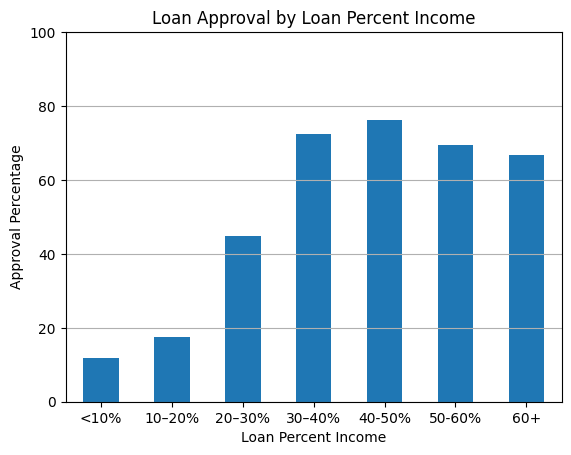

In [375]:
#Loan Approval % By Loan Percent Income
df['loan_percent_income_bins'] = pd.cut(
    df['loan_percent_income'],
    bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, df['loan_percent_income'].max()],
    labels=['<10%', '10–20%', '20–30%', '30–40%', '40-50%', '50-60%', '60+']
)

approval_by_loan_percent_income = df.groupby('loan_percent_income_bins')['loan_status'].mean() * 100

approval_by_loan_percent_income.plot(kind='bar')
plt.title("Loan Approval by Loan Percent Income")
plt.ylabel("Approval Percentage")
plt.xlabel("Loan Percent Income")
plt.xticks(rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.savefig("plots/approval_by_loan_percent_income.png")
plt.show()


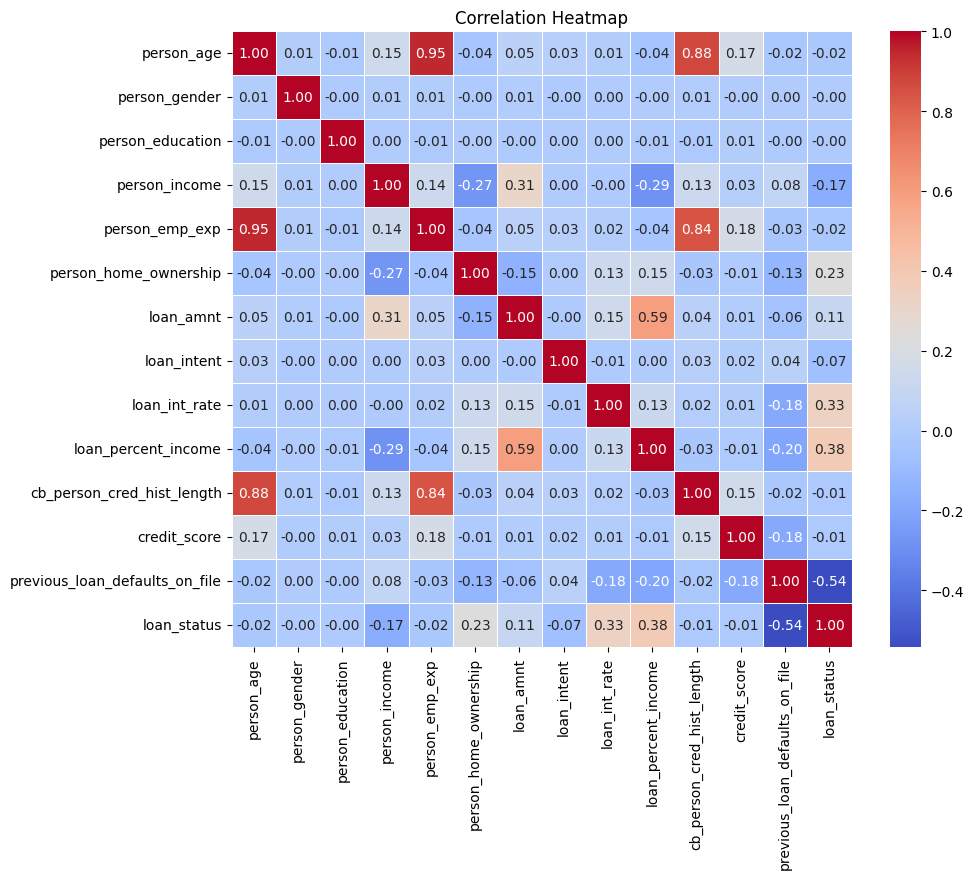

In [382]:
#Correlation Heatmap
numeric_df = df.select_dtypes('number')

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.savefig("plots/correlation_heatmap.png")
plt.show()